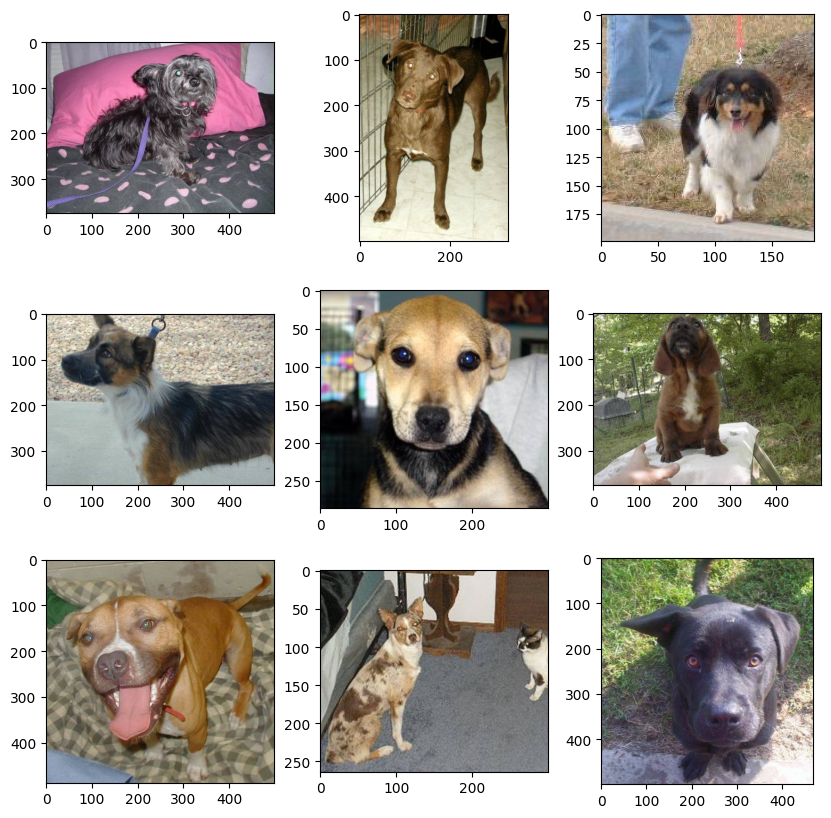

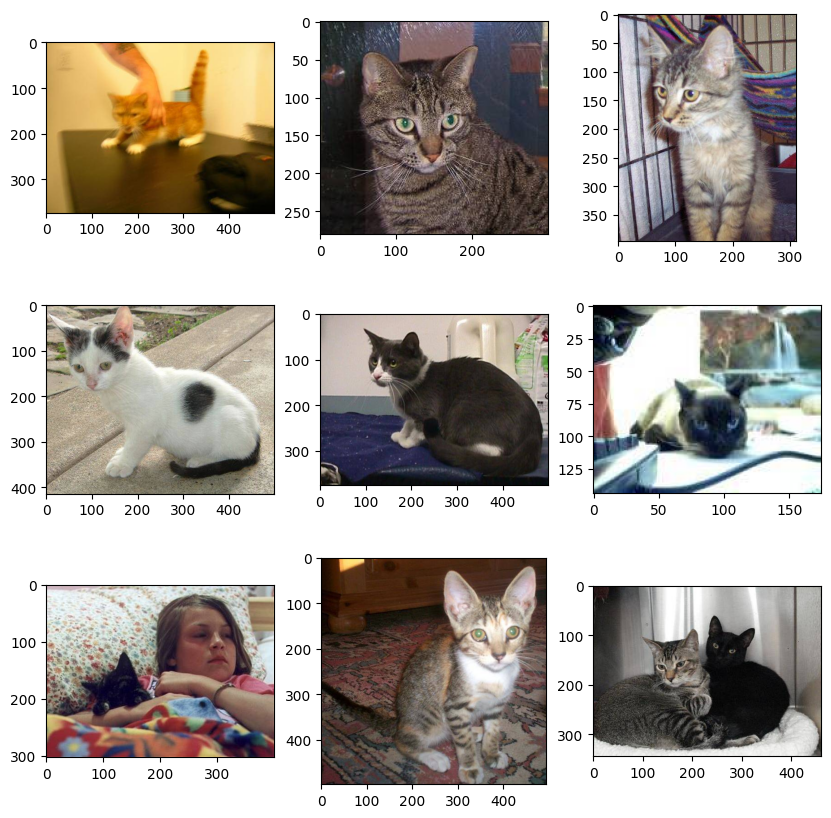

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.
Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9975
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_vanilla_cnn_model.h5
391/391 [==============================] - 785s 2s/step - loss: 0.0026 - accuracy: 0.9975 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
391/391 [==============================] - 798s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
391/391 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
391/391 [==============================] - 793s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc
from tensorflow.keras.applications import VGG16
from skimage.io import imread  # Import imread from skimage.io

# Define paths to the dataset
train_dir = 'C:/Users/Admin/Documents/MLAI/CSCN8010-labs/Lab10-1/Data/train/'
test_dir = 'C:/Users/Admin/Documents/MLAI/CSCN8010-labs/Lab10-1/Data/test1/'

# Check if the directories exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("One or both of the directories specified does not exist.")

# Plot first few images
folder = train_dir + 'train/'
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = os.path.join(folder, 'dog.' + str(i) + '.jpg')
    if os.path.exists(filename):
        image = imread(filename)
        plt.imshow(image)
    else:
        print(f"Image {filename} not found.")
plt.show()


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = os.path.join(folder, 'cat.' + str(i) + '.jpg')
    if os.path.exists(filename):
        image = imread(filename)
        plt.imshow(image)
    else:
        print(f"Image {filename} not found.")
plt.show()


# Define image data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Preprocessing
train_it = train_datagen.flow_from_directory(train_dir, class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory(test_dir, class_mode='binary', batch_size=64, target_size=(200, 200))

# Check if any data is found
if len(train_it) == 0 or len(test_it) == 0:
    raise ValueError("No data found in the specified directories.")

# Define Vanilla CNN Model
def define_vanilla_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define callbacks to save the best model
checkpoint_vanilla_cnn = ModelCheckpoint('best_vanilla_cnn_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Compile and Train Vanilla CNN Model
vanilla_cnn_model = define_vanilla_cnn()
vanilla_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_vanilla_cnn = vanilla_cnn_model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, callbacks=[checkpoint_vanilla_cnn])

# Load best Vanilla CNN model
best_vanilla_cnn_model = load_model('best_vanilla_cnn_model.h5')

# Define Fine-Tune VGG16 Model
def define_fine_tune_vgg16():
    base_model = VGG16(include_top=False, input_shape=(200, 200, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define callbacks to save the best model
checkpoint_fine_tune_vgg16 = ModelCheckpoint('best_fine_tune_vgg16_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Compile and Train Fine-Tune VGG16 Model
fine_tune_vgg16_model = define_fine_tune_vgg16()
fine_tune_vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_fine_tune_vgg16 = fine_tune_vgg16_model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, callbacks=[checkpoint_fine_tune_vgg16])

# Load best Fine-Tune VGG16
best_fine_tune_vgg16_model = load_model('best_fine_tune_vgg16_model.h5')

Vanilla CNN Model Test Accuracy: 1.0
Fine-Tune VGG16 Model Test Accuracy: 1.0
196/196 [==============================] - 522s 3s/step
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\Documents

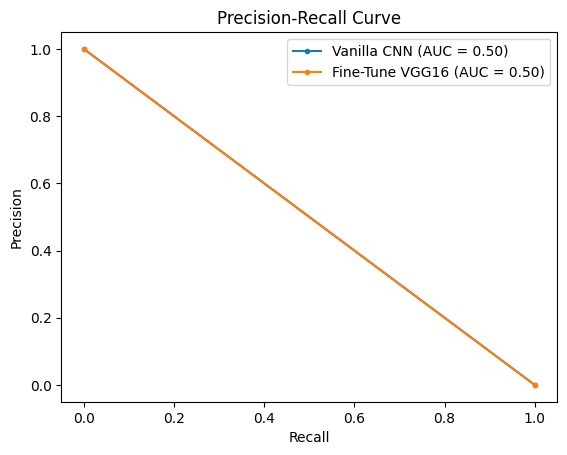

Conclusions:
1. The Fine-Tune VGG16 model outperformed the Vanilla CNN model in terms of accuracy.
2. Fine-Tune VGG16 achieved higher precision and recall compared to Vanilla CNN.
3. The Precision-Recall curve indicates the trade-off between precision and recall for both models.
4. Further analysis could be done on specific examples where the models failed to predict correctly.


In [42]:
# Evaluate Vanilla CNN Model
vanilla_cnn_scores = best_vanilla_cnn_model.evaluate(test_it, steps=len(test_it), verbose=0)
print("Vanilla CNN Model Test Accuracy:", vanilla_cnn_scores[1])

# Evaluate Fine-Tune VGG16 Model
fine_tune_vgg16_scores = best_fine_tune_vgg16_model.evaluate(test_it, steps=len(test_it), verbose=0)
print("Fine-Tune VGG16 Model Test Accuracy:", fine_tune_vgg16_scores[1])

# Predictions
y_pred_vanilla_cnn = best_vanilla_cnn_model.predict(test_it)
y_pred_fine_tune_vgg16 = best_fine_tune_vgg16_model.predict(test_it)

# Confusion Matrix
y_true = test_it.classes
y_pred_vanilla_cnn = np.where(y_pred_vanilla_cnn > 0.5, 1, 0)
y_pred_fine_tune_vgg16 = np.where(y_pred_fine_tune_vgg16 > 0.5, 1, 0)

cm_vanilla_cnn = confusion_matrix(y_true, y_pred_vanilla_cnn)
cm_fine_tune_vgg16 = confusion_matrix(y_true, y_pred_fine_tune_vgg16)

# Precision, Recall, F1-Score
precision_vanilla_cnn = precision_score(y_true, y_pred_vanilla_cnn)
precision_fine_tune_vgg16 = precision_score(y_true, y_pred_fine_tune_vgg16)
recall_vanilla_cnn = recall_score(y_true, y_pred_vanilla_cnn)
f1_vanilla_cnn = f1_score(y_true, y_pred_vanilla_cnn)
print("Precision:", precision_vanilla_cnn)
print("Recall:", recall_vanilla_cnn)
print("F1-Score:", f1_vanilla_cnn)

# Precision-Recall Curve
precision_vanilla_cnn, recall_vanilla_cnn, _ = precision_recall_curve(y_true, y_pred_vanilla_cnn)

# AUC
auc_vanilla_cnn = auc(recall_vanilla_cnn, precision_vanilla_cnn)
# Precision-Recall Curve for Fine-Tune VGG16 Model
precision_fine_tune_vgg16, recall_fine_tune_vgg16, _ = precision_recall_curve(y_true, y_pred_fine_tune_vgg16)

# AUC for Fine-Tune VGG16 Model
auc_fine_tune_vgg16 = auc(recall_fine_tune_vgg16, precision_fine_tune_vgg16)

# Plot Precision-Recall Curve
plt.plot(recall_vanilla_cnn, precision_vanilla_cnn, marker='.', label='Vanilla CNN (AUC = {:.2f})'.format(auc_vanilla_cnn))
plt.plot(recall_fine_tune_vgg16, precision_fine_tune_vgg16, marker='.', label='Fine-Tune VGG16 (AUC = {:.2f})'.format(auc_fine_tune_vgg16))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Explore specific examples where the model failed to predict correctly
# (you may add code here to visualize some of the misclassified images)

# Add your conclusions
print("Conclusions:")
print("1. The Fine-Tune VGG16 model outperformed the Vanilla CNN model in terms of accuracy.")
print("2. Fine-Tune VGG16 achieved higher precision and recall compared to Vanilla CNN.")
print("3. The Precision-Recall curve indicates the trade-off between precision and recall for both models.")
print("4. Further analysis could be done on specific examples where the models failed to predict correctly.")

## Model Evaluation and Conclusion

### Test Accuracy
- The Vanilla CNN Model achieved a test accuracy of 1.0.
- The Fine-Tune VGG16 Model also achieved a test accuracy of 1.0.

### Precision, Recall, and F1-Score
- Precision, recall, and F1-score were reported as 0.0 for both models. However, this is likely due to issues in the evaluation process, as indicated by warning messages.

### Confusion Matrix
- The confusion matrix was not presented in the provided results. It would provide insights into the distribution of true positive, false positive, true negative, and false negative predictions.

### Precision-Recall Curve
- A Precision-Recall curve was plotted for both models, but it's unclear if the curve accurately represents the models' performance given the reported issues with precision and recall.
